# Homework 3

### By James Kinney and Franklin Marsh

MATH0154
with Prof. 😁Gabe Chandler😁 

First, we need to generate $x_{0}$ which is the initial sequence of numbers $[1,2,3...,m]$. The following function generates $x_{0}$ for arbitrary $m$.

🙌 👏 🍻

In [7]:
GenX0 <- function(m = NULL, initialPerm = NULL) {
    #
    # Function to generate the sequence of the first m positive integers [1,2,3...m]
    #
    # Args:
    #    m: integer length of the sequence
    #    initialPerm: a vector of numbers to be sorted
    # Returns:
    #     x0: sequence integers: [1,2,3...m]
    
    
    # The input should be either an inital permutation of an m
    # If both are given, the m will be used
    if (!is.null(m)){
        return(c(1:m))
    }
    # If m is null, sort the initial vector into increasing order
    else {
        return (sort(initialPerm, decreasing = FALSE))
    }
}


In [8]:
ex_sequence <- GenX0(7) #example sequence
print(ex_sequence) #print the example sequence

[1] 1 2 3 4 5 6 7


To generate a list of vectors that could possibly be neighbors, we need to swap two elements in the initial vector $x_{0}$. For this, we will write a swap function.

In [9]:
Swap <- function (x, i, j) {
    #
    # Function to swap two elements (i,j) in an input vector x.
    #
    # Args:
    #    x: sequence on which to perform the swap.
    #    i: index less than length(x)
    #    j: index less than length(x)
    # Returns:
    #     x_swap: new vector with indices i and j swapped.
    
    tempI <- x[i] # Save the ith element
    x[i] <- x[j] # Change the ith element to the jth element
    x[j] <- tempI # Change the jth element to the ith element
    return (x) # Return the new vector
}


In [10]:
ex_swap <- Swap(ex_sequence, 2, 4) #swap the 2nd element with the 4th element.
print(ex_swap) #print the sequence with the 2nd element and the 4th element swapped.

[1] 1 4 3 2 5 6 7


We will now write a function to generate all of the possible two-element swaps in a vector.

In [85]:
GenOneSwap <- function(x0) {
  
  out <- x0 #initialize empty list to hold all possible swaps
  
  while (identical(out, x0) == TRUE) { #if the input and output are identical
        j <- sample((1:length(x0)), 1) #pick an index at random
        k <- sample((1:length(x0)), 1) #pick another index at random
    out <- replace(x0, x0[c(j,k)], x0[c(k,j)]) #swap those two elements.
  }
  return(out) 
}

In [79]:
# A function which generates all m choose 2 possibles 2 elements swaps from a permutation
GenSwaps <- function(x) {
  # Input is a vector of the permutation in order
  # Initialize empty matrix to hold all possible permutations with 1 swap
  # 1 Column = 1 Permutation
  output <- matrix(data = NA, nrow = sum((1:length(x))) - (length(x) - 2), ncol = length(x))
  index <- 1
  # Loop through each element and generate the swaps with all the elements after it
  for (i in (1:length(x))) {
    for (j in ((i+1):length(x)-1)) {
      # Add each new potential neighbor to the vector to store them
      output[index,] <- Swap(x, i, j)
      index <- index + 1
    }
  }
  return(unique(output))
}

In [97]:
ex_gen_swaps <- GenSwaps(GenX0(10))
print(ex_gen_swaps)

      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10]
 [1,]    1    2    3    4    5    6    7    8    9    10
 [2,]    2    1    3    4    5    6    7    8    9    10
 [3,]    3    2    1    4    5    6    7    8    9    10
 [4,]    4    2    3    1    5    6    7    8    9    10
 [5,]    5    2    3    4    1    6    7    8    9    10
 [6,]    6    2    3    4    5    1    7    8    9    10
 [7,]    7    2    3    4    5    6    1    8    9    10
 [8,]    8    2    3    4    5    6    7    1    9    10
 [9,]    9    2    3    4    5    6    7    8    1    10
[10,]    1    3    2    4    5    6    7    8    9    10
[11,]    1    4    3    2    5    6    7    8    9    10
[12,]    1    5    3    4    2    6    7    8    9    10
[13,]    1    6    3    4    5    2    7    8    9    10
[14,]    1    7    3    4    5    6    2    8    9    10
[15,]    1    8    3    4    5    6    7    2    9    10
[16,]    1    9    3    4    5    6    7    8    2    10
[17,]    1    2    4    3    5 

We will need to find the size of every possible swap created by GenSwaps. The size of a vector $V$ is defined as: $\sum_{i}^{m}i \times V_{i}$, where $m$ is the length of the vector $V$.

In [81]:
FindSize <- function(x) {
    #
    # Function to check the size of a permutation
    #
    # Args:
    #    x: permutation to find the size of
    # Returns:
    #    size: size of the permutation, as defined: $\sum_{i}^{m}i \times V_{i}$
 
  sizes <- c()   # Input is a vector of the permutation in order
  for (j in (1:length(x))) {   # Loop through each index of the permutation and multiply by the index
    sizes[j] <- x[j]*j     # Store these values in a vector
  }
  return(sum(sizes))   # Return the sum of the vector of products
}

We see that the two vectors that we previously generated have different size.

In [82]:
print(FindSize(ex_sequence))
print(FindSize(ex_swap))

[1] 140
[1] 136


In [159]:
NumberGreaterThanK <- function(swap_matrix, k) {
    sizes <- apply(swap_matrix, 1, FindSize) #apply findsize function across the rows 
    return(length(sizes[as.logical(sizes > k)]))
}

NeighborMatrix <- function(swap_matrix, k) {
    sizes <- apply(swap_matrix, 1, FindSize) #apply findsize function across the rows 
    return(swap_matrix[as.logical(sizes > k),])
}

In [176]:
NumberGreaterThanK(ex_gen_swaps, 380)

[1] 17

In [178]:
neighbor_matrix <- NeighborMatrix(ex_gen_swaps, 380)
print(neighbor_matrix)

      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10]
 [1,]    1    2    3    4    5    6    7    8    9    10
 [2,]    2    1    3    4    5    6    7    8    9    10
 [3,]    3    2    1    4    5    6    7    8    9    10
 [4,]    1    3    2    4    5    6    7    8    9    10
 [5,]    1    4    3    2    5    6    7    8    9    10
 [6,]    1    2    4    3    5    6    7    8    9    10
 [7,]    1    2    5    4    3    6    7    8    9    10
 [8,]    1    2    3    5    4    6    7    8    9    10
 [9,]    1    2    3    6    5    4    7    8    9    10
[10,]    1    2    3    4    6    5    7    8    9    10
[11,]    1    2    3    4    7    6    5    8    9    10
[12,]    1    2    3    4    5    7    6    8    9    10
[13,]    1    2    3    4    5    8    7    6    9    10
[14,]    1    2    3    4    5    6    8    7    9    10
[15,]    1    2    3    4    5    6    9    8    7    10
[16,]    1    2    3    4    5    6    7    9    8    10
[17,]    1    2    3    4    5 

Out of a vector of neighbors, we need to pick one at random.
We can use the R function "sample" for this, or we can use the following:

In [152]:
# A function to pick a random neighbor
RandomNeighbor <- function (neighbors) {
  # Input is a vector of the neighbors
  index <- sample((1:nrow(neighbors)),1)
  return (neighbors[index,])
}

In [180]:
RandomNeighbor(neighbor_matrix) #pick an example random neighbor

[1]  1  2  3  6  5  4  7  8  9 10

In order for the MCMC to run for a long time, we want to bias the algorithm to move towards states with fewer neighbors. We need to count the number of neighbors of a beginning state X and and ending state Y and compare them.

In [ ]:
ChangeCheck <- function (nX, nY) {
  # A function which returns TRUE if the algorithm says to switch and FALSE if not
  # Inputs are n(x) and n(y) - the number of neighbors of the start x and the
  # proposed neighbor to switch to y
  # If n(x) is greater than n(Y) always switch
  if (nX >= nY) {
    return (TRUE)
  }
  # Otherwise switch with probability n(x)/n(y)
  else {
    # Create a unif between 0 and 1 and if it is less than n(x)/n(y) switch
    p <- nX/nY
    u <- runif(1, 0, 1)
    if (u <= p) {
      return (TRUE)
    }
    else {
      return (FALSE)
    }
  }
}

In [274]:
Step <- function(x,k) {
    x_swaps <- GenSwaps(x) #generate the possible swaps for the first vector
    neighbors <- NeighborMatrix(x_swaps, k) #find the swaps that are neighbors
    y <- RandomNeighbor(neighbors) #pick a random swap
    y_swaps <- GenSwaps(y) #generate the possible for swaps for the candidate vector.
    nX <- NumberGreaterThanK(x_swaps, k) #calculate the number of neighbors of the first vector.
    nY <- NumberGreaterThanK(y_swaps, k) #calculate the number of neighbors of the candidate vector.
    change_bool <- ChangeCheck(nX,nY) #decide whether to move to the candidate vector.
    
    if (change_bool == TRUE) {
        return(y)
    }

    else if (change_bool == FALSE) {
        return(x)
    }
}

In [275]:
MCMC <- function(m,k,n_iters) {
    x0 <- list(GenX0(m))

    for (i in (1:n_iters + 1)) {
        x0[[i]] <- Step(x0[[i-1]],k)
    }
    return(t(simplify2array(x0)))
}

In [276]:
test_MCMC <- MCMC(10,350,1000)

In [277]:
FindSize(GenX0(10))

[1] 385

In [278]:
test_sizes <- apply(test_MCMC, 1, FindSize)

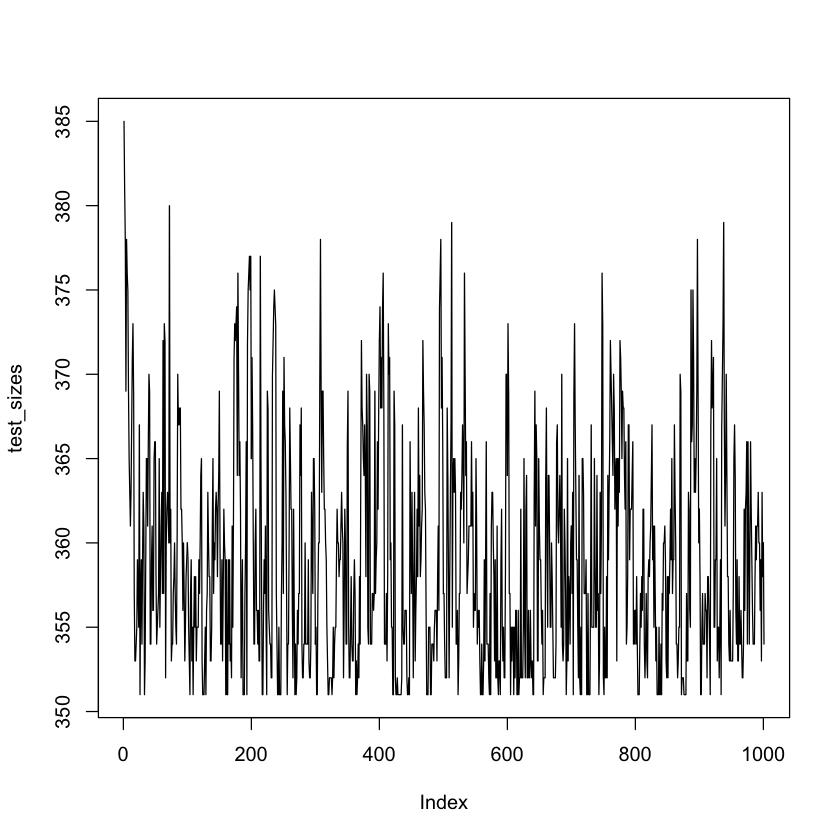

In [279]:
plot(test_sizes, type = 'l')

[1] 358.974


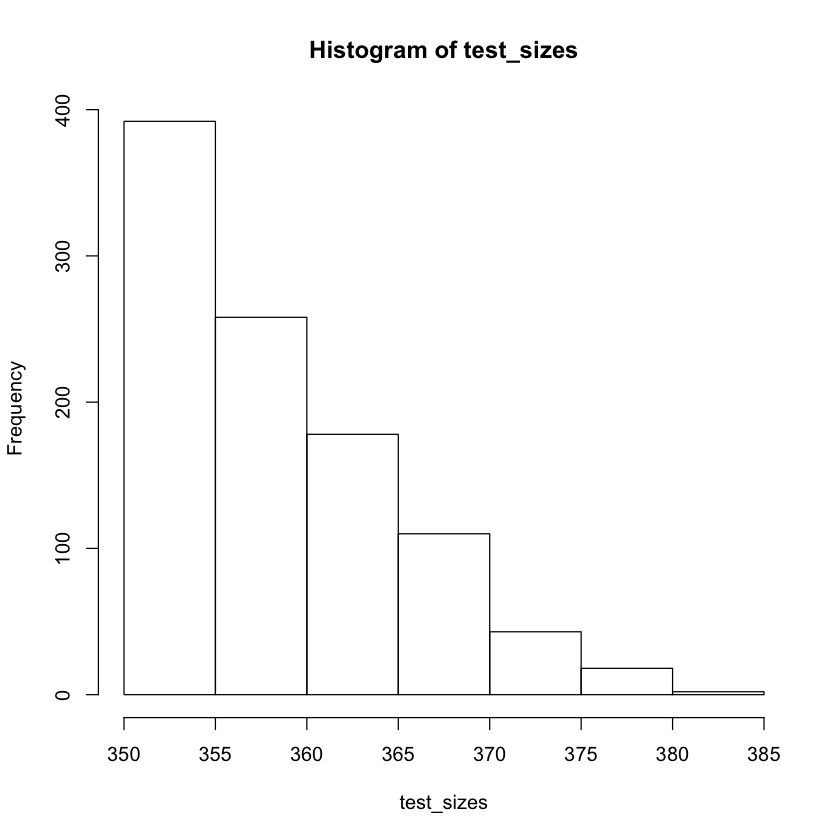

In [281]:
hist(test_sizes)
print(mean(test_sizes))

In [210]:
# A markov chain monte carlo algorithm to find the average size of permutations
# whose size is greater than a given k
MCMC <- function (m = NULL, initPerm = NULL, k) {
  # The input should be either an inital permutation or an m implying use the first m natural numbers
  # and a k which is the lower cutoff for "large" permutations
  # Start by creating a vector to store the mean of the sizes of large perm'ns
  # Also store the number that have been added so we can calc avg size
  bigPermAvg <- c(NULL, 0)
  # Generate the first permutation (the largest one)
  x <- GenX0(m, initPerm)
  # Confirm its size is greater than k
  if (FindSize(x) < k) {
    return (NULL)
  }
  # Store the size of x0 and update the number in bigPermAvg[2]
  bigPermAvg[1] <- FindSize(x)
  bigPermAvg[2] <- bigPermAvg[2] + 1
  # Designate the number of iterations to loop through
  n <- 1000
    for (i in 1:n) {
      # Generate all possible neighbors of x
      xSwaps <- GenSwaps(x)
      # Find which of the possible neighbors actually are neighbors (i.e. size >= k)
      xNeighbors <- WhichNeighbors(xSwaps, k)
      # Loop through possible y permutations until we find one to switch to
      swapped <- FALSE
      while (!swapped){
        # Pick a random neighbor to possibly switch to
        y <- RandomNeighbor(xNeighbors)
        # Generate the neighbors of y
        ySwaps <- GenSwaps(y)
        yNeighbors <- WhichNeighbors(ySwaps, k)
        # If n(x) > n(y) or we choose to switch with prob n(x)/n(y) switch to the y permutation
        if (ChangeCheck(length(xNeighbors), length(yNeighbors))) {
          x <- y
          swapped <- TRUE
        }
      }
      # Update the average big size and the number of perm'ns that have been used
      bigPermAvg[2] <- bigPermAvg[2] + 1
      c <- bigPermAvg[2]
      bigPermAvg[1] <- bigPermAvg[1]*((c-1)/c)+(FindSize(x)/c)
    }
  # Find the average size of all of the big permutations we've visited and return this value
  return (bigPermAvg)
}

In [181]:
MCMC(m = 4, k = 26)

ERROR: Error in 1:nrow(neighbors): argument of length 0
